In [101]:
from ipywidgets import widgets
from mpl_toolkits.mplot3d import axes3d
from collections import namedtuple

import csv
import re
import matplotlib


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

In [102]:
fields = [
    'xstart', 'ystart', 'zstart',
    'xstop', 'ystop', 'zstop', 'res',
    'total_pix', 'mask_core_pix', 'str_mask_fraction',
    'syn_count', 'str_density', 'syn_count_unmasked'
]
raw = open('/Users/gkiar/code/ocp/ndpaper/spatialsynapses/synapse_blocks_merged_06192016.csv', 'r').readlines()
reader = csv.reader(raw)

In [103]:
data = [[float(col) for col in row] for row in reader]

# 3D Plot

### Scatter plot with sliding threshold

In [134]:
dim = 11
lower_initial = 1.05# np.mean([d[dim] for d in data])
upper_initial = 1.12 # 2*np.mean([d[dim] for d in data])
upper_max = 4*np.mean([d[dim] for d in data])
alpha_initial = 0.2
colour_initial = '#000000'
marker_initial = 10 # worth noting: using dim 11 marker scaling is subtle since the range is small
fig_title = "3D Distribution of Synapses in Space"

Range of Data: 0.0 - 5.818
Number of Samples Currently in View: 1974 (of  114047)


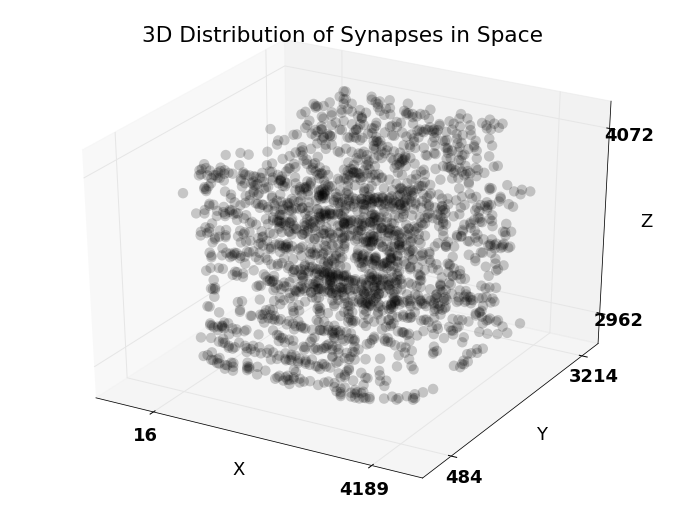

In [140]:
def plotting3d(thresh_min, thresh_max, alph, scale, colour=colour_initial, title=fig_title):
    fig0 = plt.figure(figsize=(12,9))
    ax = fig0.gca(projection="3d")
    if len(colour) < 6 or not re.search(r'^#(?:[0-9a-fA-F]{3}){1,2}$', colour):
        colour="#000000"
    new_d = np.array([d for d in data if d[dim] > thresh_min and d[11] < thresh_max])
    ax.scatter3D(
        [d[0] for d in new_d],
        [d[1] for d in new_d],
        [d[2] for d in new_d],
        s=[scale*10*d[11] for d in new_d],
        alpha=alph,
        linewidth=0,
        c=colour
    )
    print "Range of Data:", np.min([d[11] for d in data]), "-", np.max([d[dim] for d in data])
    print "Number of Samples Currently in View:", len(new_d) , "(of ", str(len(data))+")"
    ax.set_xticks([np.min(new_d[:,0]), np.max(new_d[:,0])])
    ax.set_yticks([np.min(new_d[:,1]), np.max(new_d[:,1])])
    ax.set_zticks([np.min(new_d[:,2]), np.max(new_d[:,2])])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.show()

thresh_min, thresh_max, alph, marker = (widgets.FloatSlider(description="Lower Threshold Scaling",
                                                    min=0,
                                                    max=upper_max,
                                                    value=lower_initial,
                                                    step=upper_max/100.),
                                        widgets.FloatSlider(description="Upper Threshold Scaling",
                                                    min=0,
                                                    max=upper_max,
                                                    value=upper_initial,
                                                    step=upper_max/100.),
                                        widgets.FloatSlider(description="Alpha Scaling", 
                                                    min=0,
                                                    max=1,
                                                    value=alpha_initial,
                                                    step=0.01),
                                        widgets.FloatSlider(description="Marker Scaling", 
                                                    min=0.1,
                                                    max=15,
                                                    value=marker_initial,
                                                    step=0.1))
dl = widgets.jsdlink((thresh_min, 'value'), (thresh_max, 'min'))
w = widgets.interact(plotting3d, thresh_min=thresh_min,
                     thresh_max=thresh_max, alph=alph,
                     scale=marker)

# MIP

In [204]:
buff=20
fig_title = 'Maximum Intensity Projection of Synapses\n\n'
alpha_initial = 0.1
marker_initial = 12

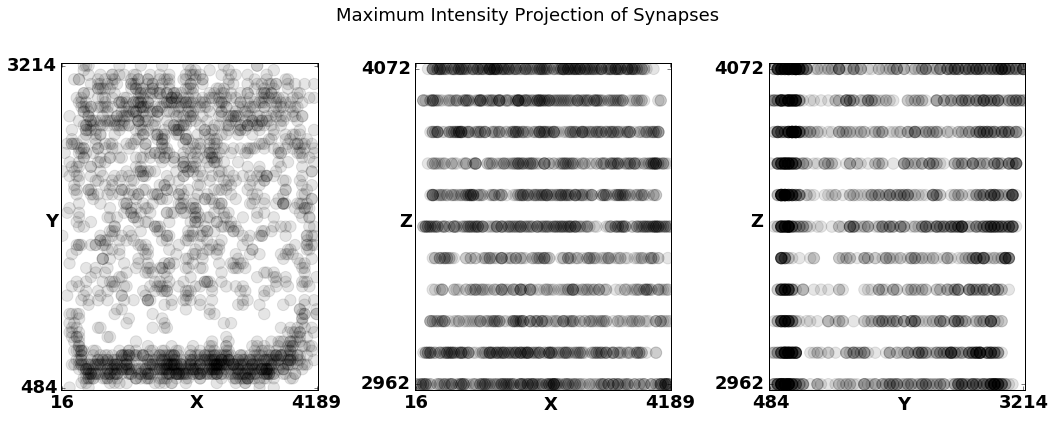

In [228]:
def projections(thresh_min, thresh_max, alph, scale, colour=colour_initial, title=fig_title):
    new_d = np.array([d for d in data if d[dim] > thresh_min and d[dim] < thresh_max])

    fig = plt.figure(figsize=(15,6))
    ax = plt.subplot(1,3,1)
    plt.hold(True)
    plt.scatter(
        [d[0] for d in new_d],
        [d[1] for d in new_d],
        s=[10*scale*d[dim] for d in new_d],
        alpha=alph,
        c=colour
    )
    plt.xlim([np.min(new_d[:,0])-buff, np.max(new_d[:,0])+buff])
    plt.ylim([np.min(new_d[:,1])-buff, np.max(new_d[:,1])+buff])
    plt.xticks([np.min(new_d[:,0]), np.max(new_d[:,0])])
    plt.yticks([np.min(new_d[:,1]), np.max(new_d[:,1])])
    plt.text(np.min(new_d[:,0])-buff-260, (np.min(new_d[:,1])-buff + np.max(new_d[:,1])+buff)/2, 'Y')
    plt.text((np.min(new_d[:,0])-buff + np.max(new_d[:,0])+buff)/2, np.min(new_d[:,1])-buff-150, 'X')
    
    ax = plt.subplot(1,3,2)
    plt.hold(True)
    plt.scatter(
        [d[0] for d in new_d],
        [d[2] for d in new_d],
        s=[10*scale*d[dim] for d in new_d],
        alpha=alph,
        c=colour
    )
    plt.xlim([np.min(new_d[:,0])-buff, np.max(new_d[:,0])+buff])
    plt.ylim([np.min(new_d[:,2])-buff, np.max(new_d[:,2])+buff])
    plt.xticks([np.min(new_d[:,0]), np.max(new_d[:,0])])
    plt.yticks([np.min(new_d[:,2]), np.max(new_d[:,2])])
    plt.text(np.min(new_d[:,0])-buff-250, (np.min(new_d[:,2])-buff + np.max(new_d[:,2])+buff)/2, 'Z')
    plt.text((np.min(new_d[:,0])-buff + np.max(new_d[:,0])+buff)/2, np.min(new_d[:,2])-buff-70, 'X')
    
    ax = plt.subplot(1,3,3)
    plt.hold(True)
    plt.scatter(
        [d[1] for d in new_d],
        [d[2] for d in new_d],
        s=[10*scale*d[dim] for d in new_d],
        alpha=alph,
        c=colour
    )
    plt.xlim([np.min(new_d[:,1])-buff, np.max(new_d[:,1])+buff])
    plt.ylim([np.min(new_d[:,2])-buff, np.max(new_d[:,2])+buff])
    plt.xticks([np.min(new_d[:,1]), np.max(new_d[:,1])])
    plt.yticks([np.min(new_d[:,2]), np.max(new_d[:,2])])
    plt.text(np.min(new_d[:,1])-buff-200, (np.min(new_d[:,2])-buff + np.max(new_d[:,2])+buff)/2, 'Z')
    plt.text((np.min(new_d[:,1])-buff + np.max(new_d[:,1])+buff)/2, np.min(new_d[:,2])-buff-70, 'Y')
    plt.tight_layout()
    plt.suptitle(title)
    plt.subplots_adjust(top=0.85)
    plt.show()
    
thresh_min, thresh_max, alph, marker = (widgets.FloatSlider(description="Lower Threshold Scaling",
                                                    min=0,
                                                    max=upper_max,
                                                    value=lower_initial,
                                                    step=upper_max/100.),
                                        widgets.FloatSlider(description="Upper Threshold Scaling",
                                                    min=0,
                                                    max=upper_max,
                                                    value=upper_initial,
                                                    step=upper_max/100.),
                                        widgets.FloatSlider(description="Alpha Scaling", 
                                                    min=0,
                                                    max=1,
                                                    value=alpha_initial,
                                                    step=0.01),
                                        widgets.FloatSlider(description="Marker Scaling", 
                                                    min=0.1,
                                                    max=15,
                                                    value=marker_initial,
                                                    step=0.1))
dl = widgets.jsdlink((thresh_min, 'value'), (thresh_max, 'min'))
w = widgets.interact(projections, thresh_min=thresh_min,
                     thresh_max=thresh_max, alph=alph,
                     scale=marker)

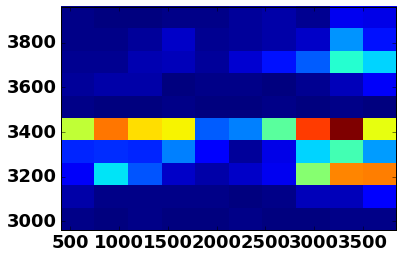

In [210]:
ax = plt.hist2d(
    [d[0] for d in data if d[-3] > THRESH],
    #[d[1] for d in data if d[-3] > THRESH],
    [d[2] for d in data if d[-3] > THRESH],
    bins=10
)
plt.show()

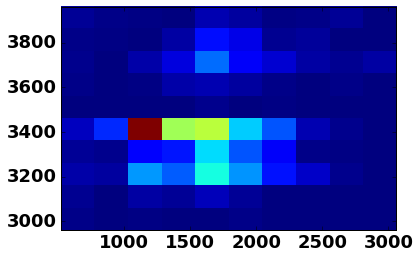

In [211]:
_ = plt.hist2d(
    #[d[0] for d in data if d[-3] > THRESH],
    [d[1] for d in data if d[-3] > THRESH],
    [d[2] for d in data if d[-3] > THRESH],
    bins=10
)
plt.show()

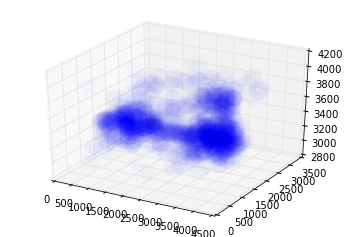

In [9]:
fig0 = plt.figure(0)
ax = fig0.gca(projection="3d")
ax.scatter3D(
    [d[0] for d in data if d[-3] > THRESH],
    [d[1] for d in data if d[-3] > THRESH],
    [d[2] for d in data if d[-3] > THRESH],
    linewidth=0,
    alpha=0.02,
    s=[d[-3] for d in data if d[-3] > THRESH]
)
plt.show()
